In [1]:
import os

import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INPUT_JPG_IMAGES_DIR = 'input_jpg_images'
INPUT_GRAY_JPG_IMAGES_DIR = 'input_gray_jpg_images'
OUTPUT_JPG_IMAGES_DIR = 'output_jpg_images'

if not os.path.exists(INPUT_GRAY_JPG_IMAGES_DIR):
    os.makedirs(INPUT_GRAY_JPG_IMAGES_DIR)
if not os.path.exists(OUTPUT_JPG_IMAGES_DIR):
    os.makedirs(OUTPUT_JPG_IMAGES_DIR)

IMG_FILEPATH = os.path.join(INPUT_JPG_IMAGES_DIR, 'dog_wearing_mask.jpg')
IMG_GRAY_FILEPATH = os.path.join(INPUT_GRAY_JPG_IMAGES_DIR, 'dog_wearing_mask_grayscale.jpg')
OUTPUT_FILEPATH = os.path.join(OUTPUT_JPG_IMAGES_DIR, 'dog_wearing_mask_compressed.jpg')

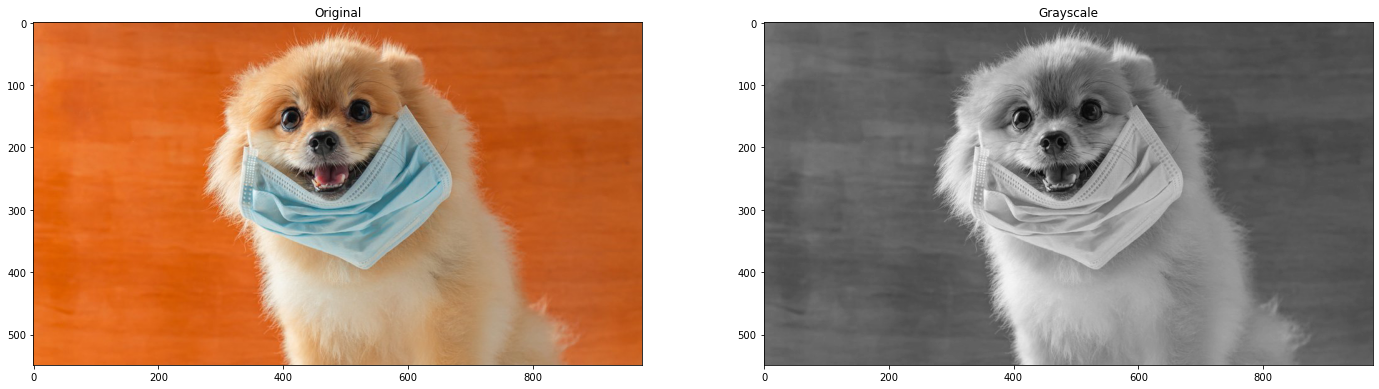

In [3]:
img = cv2.imread(IMG_FILEPATH)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2.imwrite(IMG_GRAY_FILEPATH, img_gray)

plt.figure(figsize=(24, 12), constrained_layout=False)
plt.subplot(121)
plt.title(f'Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title(f'Grayscale')
plt.imshow(img_gray, 'gray');

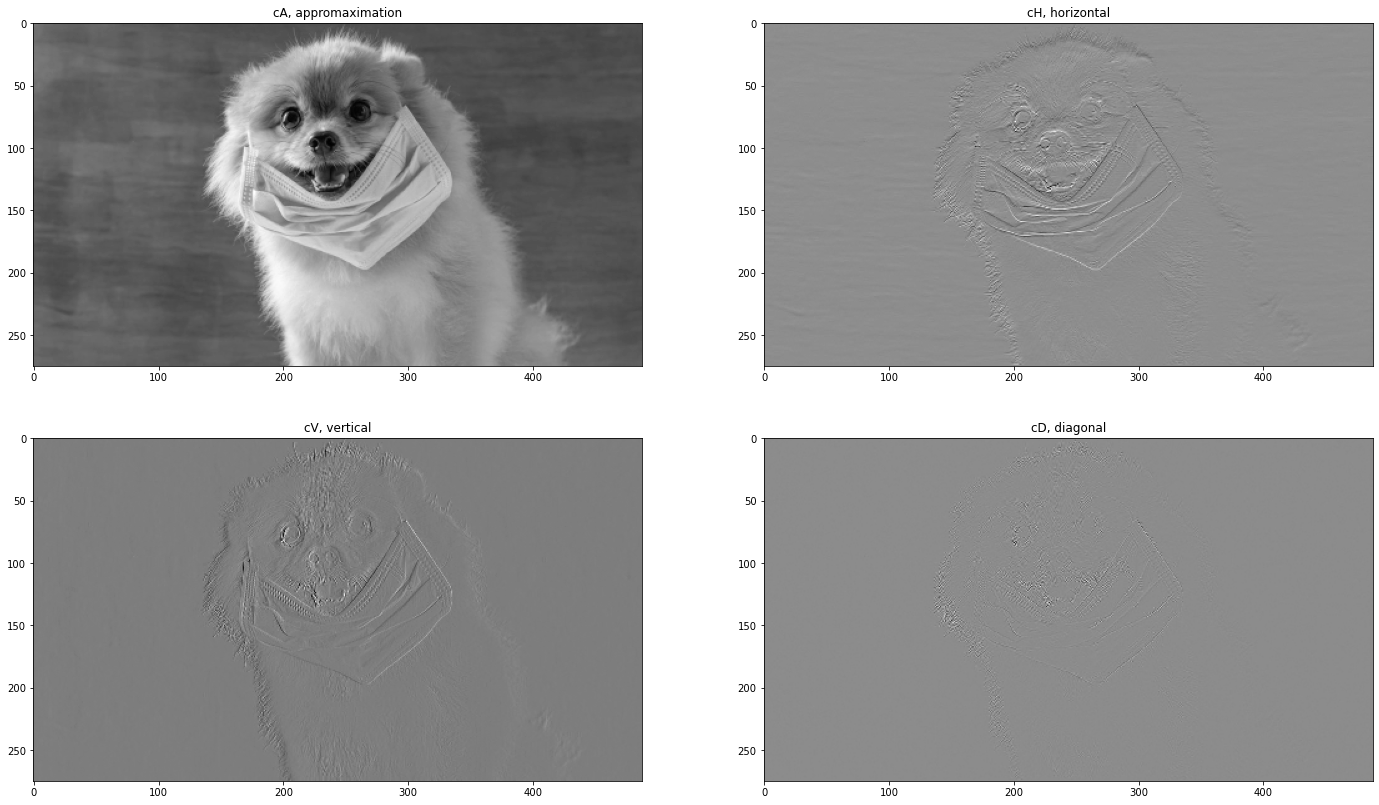

In [4]:
cA, (cH, cV, cD) = coeffs = pywt.dwt2(img_gray, 'haar')

plt.figure(figsize=(24, 14), constrained_layout=False)
plt.subplot(221)
plt.imshow(cA, 'gray')
plt.title('cA, appromaximation')

plt.subplot(222)
plt.imshow(cH, 'gray')
plt.title('cH, horizontal')

plt.subplot(223)
plt.imshow(cV, 'gray')
plt.title('cV, vertical')

plt.subplot(224)
plt.imshow(cD, 'gray')
plt.title('cD, diagonal');

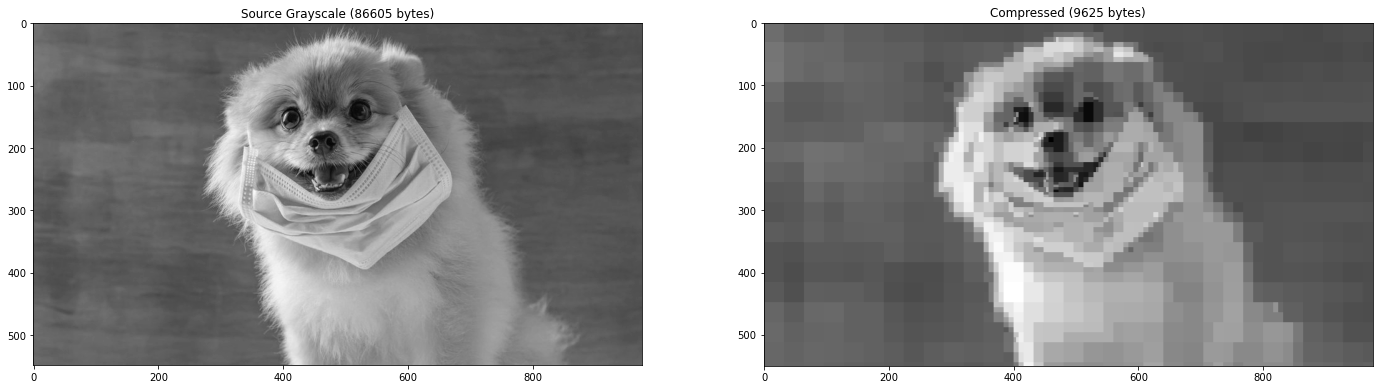

In [5]:
coeffs = pywt.wavedec2(img_gray, 'haar', level=5)

threshold = 200

for i in range(1, len(coeffs)):
    coeffs[i] = (
        np.where(((coeffs[i][0] < -threshold) | (coeffs[i][0] > threshold)), coeffs[i][0], 0),
        np.where(((coeffs[i][1] < -threshold) | (coeffs[i][1] > threshold)), coeffs[i][1], 0),
        np.where(((coeffs[i][2] < -threshold) | (coeffs[i][2] > threshold)), coeffs[i][2], 0),
    )

img_compressed = pywt.waverec2(coeffs, 'haar')
cv2.imwrite(OUTPUT_FILEPATH, img_compressed)

plt.figure(figsize=(24, 12), constrained_layout=False)
plt.subplot(121)
plt.imshow(img_gray, 'gray')
plt.title(f'Source Grayscale ({os.stat(IMG_GRAY_FILEPATH).st_size} bytes)')

plt.subplot(122)
plt.imshow(img_compressed, 'gray')
plt.title(f'Compressed ({os.stat(OUTPUT_FILEPATH).st_size} bytes)');